In [2]:
import cirq
import recirq
import numpy as np
import cirq_google

In [3]:
working_device = cirq_google.Sycamore
print(working_device)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

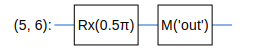

In [4]:
my_qubit = cirq.GridQubit(5, 6)
from cirq.contrib.svg import SVGCircuit

# Create a circuit with X, Ry(pi/2) and H.
my_circuit = cirq.Circuit(
    # Rotate the qubit pi/2 radians around the X axis.
    cirq.rx(np.pi / 2).on(my_qubit),
    # Measure the qubit.
    cirq.measure(my_qubit, key="out"),
)
SVGCircuit(my_circuit)

In [5]:
sim = cirq.Simulator()
samples = sim.sample(my_circuit, repetitions=10)

In [6]:
state_vector_before_measurement = sim.simulate(my_circuit[:-1])
sampled_state_vector_after_measurement = sim.simulate(my_circuit)

print(f"State before measurement:")
print(state_vector_before_measurement)
print(f"State after measurement:")
print(sampled_state_vector_after_measurement)

State before measurement:
measurements: (no measurements)

qubits: (cirq.GridQubit(5, 6),)
output vector: 0.707|0⟩ - 0.707j|1⟩

phase:
output vector: |⟩
State after measurement:
measurements: out=1

qubits: (cirq.GridQubit(5, 6),)
output vector: -1j|1⟩

phase:
output vector: |⟩


In [7]:
noisy_sim = cirq.DensityMatrixSimulator(noise=cirq.depolarize(0.1))
noisy_post_measurement_state = noisy_sim.simulate(my_circuit)
noisy_pre_measurement_state = noisy_sim.simulate(my_circuit[:-1])

print("Noisy state after measurement:" + str(noisy_post_measurement_state))
print("Noisy state before measurement:" + str(noisy_pre_measurement_state))

Noisy state after measurement:measurements: out=1

qubits: (cirq.GridQubit(5, 6),)
final density matrix:
[[0.06666666+0.j 0.        +0.j]
 [0.        +0.j 0.9333333 +0.j]]

phase:
final density matrix:
[[1.+0.j]]
Noisy state before measurement:measurements: (no measurements)

qubits: (cirq.GridQubit(5, 6),)
final density matrix:
[[0.49999994+0.j         0.        +0.43333334j]
 [0.        -0.43333334j 0.49999994+0.j        ]]

phase:
final density matrix:
[[1.+0.j]]


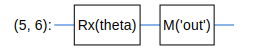

In [8]:
import sympy

theta = sympy.Symbol("theta")

parameterized_circuit = cirq.Circuit(
    cirq.rx(theta).on(my_qubit), cirq.measure(my_qubit, key="out")
)
SVGCircuit(parameterized_circuit)

In [9]:
sim.sample(parameterized_circuit, params={theta: 2}, repetitions=10)

,theta,out
0,2,1
1,2,0
2,2,0
3,2,1
4,2,1
5,2,0
6,2,1
7,2,1
8,2,0
9,2,0


In [10]:
sim.sample(parameterized_circuit, params=[{theta: 0.5}, {theta: np.pi}], repetitions=10)

,theta,out
0,0.500000,0
1,0.500000,0
2,0.500000,0
3,0.500000,0
4,0.500000,0
5,0.500000,0
6,0.500000,0
7,0.500000,0
8,0.500000,0
9,0.500000,0


In [11]:
sim.sample(
    parameterized_circuit,
    params=cirq.Linspace(theta, start=0, stop=np.pi, length=5),
    repetitions=5,
)

,theta,out
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
0,0.785398,0
1,0.785398,0
2,0.785398,0
3,0.785398,0
4,0.785398,0


<Axes: xlabel='theta'>

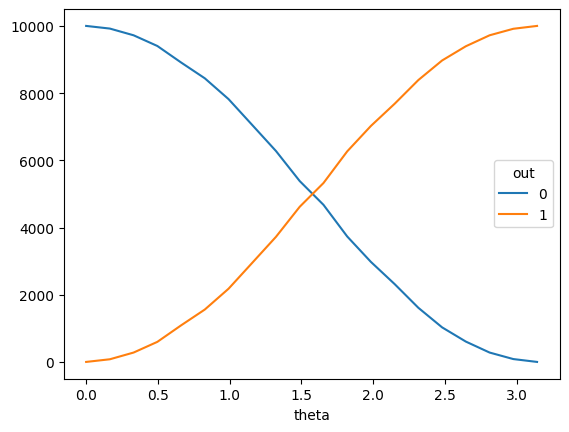

In [12]:
import pandas

big_results = sim.sample(
    parameterized_circuit,
    params=cirq.Linspace(theta, start=0, stop=np.pi, length=20),
    repetitions=10_000,
)

# big_results is too big to look at. Plot cross tabulated data instead.
pandas.crosstab(big_results.theta, big_results.out).plot()

C:\Users\Joker\anaconda3\lib\site-packages\recirq\benchmarks\rabi_oscillations.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='Rabi Angle (Radian)', ylabel='Excited State Probability'>

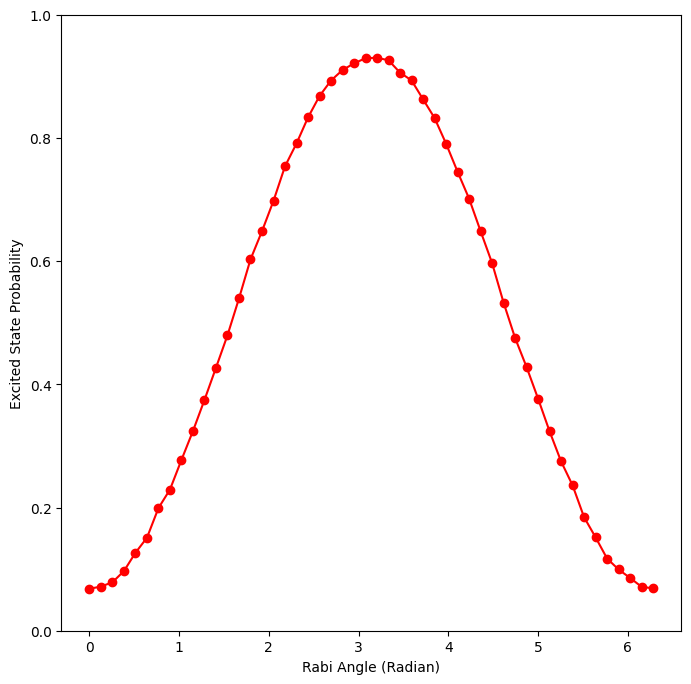

In [13]:
import datetime
from recirq.benchmarks import rabi_oscillations

result = rabi_oscillations(
    sampler=noisy_sim, qubit=my_qubit, num_points=50, repetitions=10000
)
result.plot()

In [14]:
import hashlib


class SecretNoiseModel(cirq.NoiseModel):
    def noisy_operation(self, op):
        # Hey! No peeking!
        q = op.qubits[0]
        v = hashlib.sha256(str(q).encode()).digest()[0] / 256
        yield cirq.depolarize(v).on(q)
        yield op


secret_noise_sampler = cirq.DensityMatrixSimulator(noise=SecretNoiseModel())

qubit cirq.GridQubit(5, 7)


C:\Users\Joker\anaconda3\lib\site-packages\recirq\benchmarks\rabi_oscillations.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='Rabi Angle (Radian)', ylabel='Excited State Probability'>

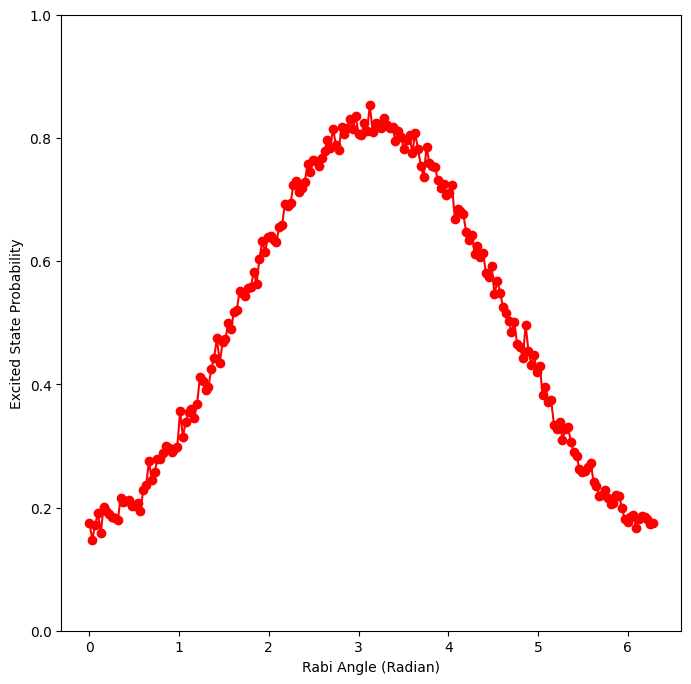

In [15]:
q = list(cirq_google.Sycamore.metadata.qubit_set)[3]
print("qubit", repr(q))
rabi_oscillations(sampler=secret_noise_sampler, qubit=q).plot()